# Customer segmentation

Sprocket Pvt Ltd is a client of KPMG AU. Sprocket is a bike and bike accessories retail business. They are looking to find the right customer segment to target for marketing in order to boost revenue. The following dataset contains their customer demographics for the past 3 years.

We will not define each column in this section, as the column names are self-explanatory. Instead, we will proceed to process the data.

## What are we going to cover in this analysis?

The first step is to clean the data. This includes removing any duplicate or incomplete records. We will also convert any categorical data to numerical data.

Once the data has been cleaned, we will perform some basic statistical analysis. This will help us to understand the distribution of the data and identify any trends.

Finally, we will use the results of the statistical analysis to identify the most promising customer segments. We will then develop a marketing strategy that is targeted at these segments.

We believe that this approach will help Sprocket to identify the right customers to target and boost their revenue.

In [832]:
# Data manipulation
import pandas as pd
import os
import numpy as np
from datetime import datetime, timedelta

#Plots
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.cm import Blues_r

#Process and modeling
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Warnings
import warnings

Now that we have all of the files in a DataFrame, we can split them into separate DataFrames based on their names.

In [833]:
# Dataset available
c_address = pd.read_csv('./Files/CustomerAddress.csv')
c_demo = pd.read_csv('./Files/CustomerDemographic.csv')
transac = pd.read_csv('./Files/Transactions.csv')
new_c_list = pd.read_csv('./Files/NewCustomerList.csv')

Now that we have all of the data in each variable, we can evaluate their shape and information.

In [834]:
# Let's see which columns have Null Values
c_demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          4000 non-null   int64  
 1   first_name                           4000 non-null   object 
 2   last_name                            3875 non-null   object 
 3   gender                               4000 non-null   object 
 4   past_3_years_bike_related_purchases  4000 non-null   int64  
 5   DOB                                  3913 non-null   object 
 6   job_title                            3494 non-null   object 
 7   job_industry_category                3344 non-null   object 
 8   wealth_segment                       4000 non-null   object 
 9   deceased_indicator                   4000 non-null   object 
 10  default                              3698 non-null   object 
 11  owns_car                      

Last_name is one fiel that we can keep, replacing null values to Not Given, so we can keep this record and with the first name is enough for further analysis.

What about DOB? Let's filter the null values

In [835]:
# Let's see all features if they have more null data points
c_demo.loc[c_demo['DOB'].isnull()]

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
143,144,Jory,Barrabeale,U,71,NaN,Environmental Tech,IT,Mass Customer,N,NaN,No,NaN
167,168,Reggie,Broggetti,U,8,NaN,General Manager,IT,Affluent Customer,N,NaN,Yes,NaN
266,267,Edgar,Buckler,U,53,NaN,NaN,IT,High Net Worth,N,NaN,No,NaN
289,290,Giorgio,Kevane,U,42,NaN,Senior Sales Associate,IT,Mass Customer,N,NaN,No,NaN
450,451,Marlow,Flowerdew,U,37,NaN,Quality Control Specialist,IT,High Net Worth,N,NaN,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3778,3779,Ulick,Daspar,U,68,NaN,NaN,IT,Affluent Customer,N,NaN,No,NaN
3882,3883,Nissa,Conrad,U,35,NaN,Legal Assistant,IT,Mass Customer,N,NaN,No,NaN
3930,3931,Kylie,Epine,U,19,NaN,NaN,IT,High Net Worth,N,NaN,Yes,NaN
3934,3935,Teodor,Alfonsini,U,72,NaN,NaN,IT,High Net Worth,N,NaN,Yes,NaN


Upon reviewing the table, we can see that the columns Gender, Job Title, Default, and Tenure contain null values. These null values represent less than 3% of the data. In order to improve the accuracy of our customer segmentation analysis, we will need complete data for all of our features.

In [836]:
# Let's start with DOB
c_demo = c_demo.dropna(axis=0, how='any', subset=['DOB'])
c_demo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3913 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          3913 non-null   int64  
 1   first_name                           3913 non-null   object 
 2   last_name                            3792 non-null   object 
 3   gender                               3913 non-null   object 
 4   past_3_years_bike_related_purchases  3913 non-null   int64  
 5   DOB                                  3913 non-null   object 
 6   job_title                            3416 non-null   object 
 7   job_industry_category                3257 non-null   object 
 8   wealth_segment                       3913 non-null   object 
 9   deceased_indicator                   3913 non-null   object 
 10  default                              3698 non-null   object 
 11  owns_car                      

In [837]:
# Let's see all features if they have more null data points
c_demo.loc[c_demo['last_name'].isnull()]

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
3,4,Talbot,NaN,Male,33,03/10/61,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
66,67,Vernon,NaN,Male,67,14/06/60,Web Developer II,Retail,Mass Customer,N,<svg><script>0<1>alert('XSS')</script>,No,18.0
105,106,Glyn,NaN,Male,54,03/07/66,Software Test Engineer III,Health,High Net Worth,N,ãã¼ãã£ã¼ã¸è¡ããªãã,Yes,18.0
138,139,Gar,NaN,Male,1,28/07/64,Operator,Telecommunications,Affluent Customer,N,-1.00E+02,No,4.0
196,197,Avis,NaN,Female,32,27/01/77,NaN,NaN,High Net Worth,N,NaN,No,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3884,3885,Asher,NaN,Male,55,17/06/78,Actuary,Financial Services,Mass Customer,N,"×Ö¼Ö°×¨Öµ××©×Ö´××ª, ×Ö¼Ö¸×¨Ö¸× ×Ö±×Ö¹×Ö´××, ×Ö...",Yes,8.0
3915,3916,Myrtia,NaN,Female,31,17/10/58,NaN,Retail,Affluent Customer,N,"Ø«Ù ÙÙØ³ Ø³ÙØ·Øª ÙØ¨Ø§ÙØªØ­Ø¯ÙØ¯Ø, Ø¬Ø²ÙØ±ØªÙ ...",Yes,17.0
3926,3927,Conway,NaN,Male,29,07/01/78,Electrical Engineer,Manufacturing,Mass Customer,N,Ã¥ÃâÆÂ©ËâËÂ¬â¦Ã¦,Yes,7.0
3961,3962,Benoit,NaN,Male,17,06/10/77,Project Manager,Argiculture,High Net Worth,N,",ãã»:*:ã»ãâ( â» Ï â» )ãã»:*:ã»ãâ",Yes,14.0


In [838]:
# As we can see, the majority of null values are in the last_name column. We can keep these rows and replace the null values with NG, which stands for "Not Given".
c_demo['last_name'].fillna('NG', inplace=True)
c_demo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3913 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          3913 non-null   int64  
 1   first_name                           3913 non-null   object 
 2   last_name                            3913 non-null   object 
 3   gender                               3913 non-null   object 
 4   past_3_years_bike_related_purchases  3913 non-null   int64  
 5   DOB                                  3913 non-null   object 
 6   job_title                            3416 non-null   object 
 7   job_industry_category                3257 non-null   object 
 8   wealth_segment                       3913 non-null   object 
 9   deceased_indicator                   3913 non-null   object 
 10  default                              3698 non-null   object 
 11  owns_car                      

We are good with last_name, let's proceed with job title.

In [839]:
# Let's see all features if they have more null data points
c_demo.loc[c_demo['job_title'].isnull() & c_demo['job_industry_category'].isnull() ]

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
22,23,Olav,Polak,Male,43,10/02/95,NaN,NaN,High Net Worth,N,01-Feb,Yes,1.0
45,46,Kaila,Allin,Female,98,26/02/72,NaN,NaN,Affluent Customer,N,â°â´âµâââ,Yes,15.0
73,74,Pansy,Kiddie,Female,94,19/06/69,NaN,NaN,Mass Customer,N,ã»(ï¿£âï¿£)ã»:*:,Yes,6.0
107,108,Kayle,Mingaud,Female,4,14/03/94,NaN,NaN,High Net Worth,N,âð¿ ðªð¿ ðð¿ ðð¿ ðð¿ ðð¿,No,3.0
160,161,Tadd,Bloss,Male,49,21/01/76,NaN,NaN,Mass Customer,N,() { 0; }; touch /tmp/blns.shellshock1.fail;,No,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3839,3840,Marc,Torrans,Male,27,30/09/62,NaN,NaN,High Net Worth,N,NaN,No,5.0
3892,3893,Hadria,Moles,Female,7,18/11/96,NaN,NaN,High Net Worth,N,â«testâ«,Yes,4.0
3928,3929,Jacqui,Fortnam,Female,50,18/10/89,NaN,NaN,Affluent Customer,N,Â¸ËÃâÄ±ËÃÂ¯ËÂ¿,Yes,10.0
3932,3933,Chiarra,Cops,Female,65,05/07/83,NaN,NaN,High Net Worth,N,1.00E+02,Yes,10.0


Upon reviewing the null values in the job_title and job_industry columns, we realized that they contain a significant number of data points that could be helpful for our future analysis. It is possible that some customers in this customer segmentation do not care about these titles or did not want to specify them in the form. Therefore, we will replace the null values in these columns with the string ND, which stands for "Not Defined".

In [840]:
# Let's replace null values of features
c_demo['job_industry_category'].fillna('ND', inplace=True) # ND as Not Defined
c_demo['job_title'].fillna('ND', inplace=True)
c_demo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3913 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          3913 non-null   int64  
 1   first_name                           3913 non-null   object 
 2   last_name                            3913 non-null   object 
 3   gender                               3913 non-null   object 
 4   past_3_years_bike_related_purchases  3913 non-null   int64  
 5   DOB                                  3913 non-null   object 
 6   job_title                            3913 non-null   object 
 7   job_industry_category                3913 non-null   object 
 8   wealth_segment                       3913 non-null   object 
 9   deceased_indicator                   3913 non-null   object 
 10  default                              3698 non-null   object 
 11  owns_car                      

The default columns in the form are not providing us with any relevant information. We need to speak with the client to address this issue. We can either ask them to modify the form so that the columns provide us with the information we need, or we can remove the columns altogether and reduce the amount of data we need to collect.

We proceed to remove this column

In [841]:
# Drop the column and see our dataset information
c_demo = c_demo.drop(columns=['default'])
c_demo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3913 entries, 0 to 3999
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          3913 non-null   int64  
 1   first_name                           3913 non-null   object 
 2   last_name                            3913 non-null   object 
 3   gender                               3913 non-null   object 
 4   past_3_years_bike_related_purchases  3913 non-null   int64  
 5   DOB                                  3913 non-null   object 
 6   job_title                            3913 non-null   object 
 7   job_industry_category                3913 non-null   object 
 8   wealth_segment                       3913 non-null   object 
 9   deceased_indicator                   3913 non-null   object 
 10  owns_car                             3913 non-null   object 
 11  tenure                        

Having our first dataset process let's continue with Transaction one and analyze their null values

In [842]:
# See again our DataFrame
transac.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,25/02/17,False,Approved,Solex,Standard,medium,medium,71.49,$53.62,41245.0
1,2,3,3120,21/05/17,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,$388.92,41701.0
2,3,37,402,16/10/17,False,Approved,OHM Cycles,Standard,low,medium,1793.43,$248.82,36361.0
3,4,88,3135,31/08/17,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,$381.10,36145.0
4,5,78,787,01/10/17,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,$709.48,42226.0


In [843]:
# Let's see the columns with null values
transac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   transaction_id           20000 non-null  int64  
 1   product_id               20000 non-null  int64  
 2   customer_id              20000 non-null  int64  
 3   transaction_date         20000 non-null  object 
 4   online_order             19640 non-null  object 
 5   order_status             20000 non-null  object 
 6   brand                    19803 non-null  object 
 7   product_line             19803 non-null  object 
 8   product_class            19803 non-null  object 
 9   product_size             19803 non-null  object 
 10  list_price               20000 non-null  float64
 11  standard_cost            19803 non-null  object 
 12  product_first_sold_date  19803 non-null  float64
dtypes: float64(2), int64(3), object(8)
memory usage: 2.0+ MB


We have a dataset of product IDs, some of which have null values for brand, product line, and product class. Let's evaluate one of these null values to see if we can obtain the missing information from another ID that has a complete row and then fill in the null values.

In [844]:
# Let's see how many product_id do we have
transac.loc[transac['brand'].isnull()].groupby(['product_id'])['product_id'].count()

product_id
0    197
Name: product_id, dtype: int64

In [845]:
# As we got just product_id = 0, let's filter the brand that are related to it
transac.loc[transac['product_id'] == 0].groupby(['brand'])['product_line'].count()

brand
Giant Bicycles    105
Norco Bicycles    241
OHM Cycles        242
Solex             276
Trek Bicycles     221
WeareA2B           96
Name: product_line, dtype: int64

After filtering, we found that no product_id has a value of 0 for the target variable. Therefore, it is not possible to replace the null values with similar data. We calculated that the null values represent less than 1% of the total data. Therefore, we decided to remove these rows from the dataset.

In [846]:
# How about our distribution on Online_order column
transac.groupby(['online_order'])['product_id'].count()

online_order
False    9811
True     9829
Name: product_id, dtype: int64

In [847]:
# Drop null values
transac = transac.dropna()
transac.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19445 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   transaction_id           19445 non-null  int64  
 1   product_id               19445 non-null  int64  
 2   customer_id              19445 non-null  int64  
 3   transaction_date         19445 non-null  object 
 4   online_order             19445 non-null  object 
 5   order_status             19445 non-null  object 
 6   brand                    19445 non-null  object 
 7   product_line             19445 non-null  object 
 8   product_class            19445 non-null  object 
 9   product_size             19445 non-null  object 
 10  list_price               19445 non-null  float64
 11  standard_cost            19445 non-null  object 
 12  product_first_sold_date  19445 non-null  float64
dtypes: float64(2), int64(3), object(8)
memory usage: 2.1+ MB


Since the data is balanced, it is not possible to assign predominant values to the null values. We calculated that the null values represent less than 2% of the total data. Therefore, we decided to remove these rows from the dataset, just like we did with the other columns that had null values. Additionally, we have observed that the "standard_cost" column is an object. This should be changed to a float data type.

In [848]:
transac['standard_cost'] = transac['standard_cost'].astype(str).str.replace(r'\$|,', '', regex=True)

# Convert the column to float64 data type
transac['standard_cost'] = transac['standard_cost'].astype('float64')

*Let's continue with the next dataset new_c_list*

In [849]:
new_c_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   first_name                           1000 non-null   object 
 1   last_name                            971 non-null    object 
 2   gender                               1000 non-null   object 
 3   past_3_years_bike_related_purchases  1000 non-null   int64  
 4   DOB                                  983 non-null    object 
 5   job_title                            894 non-null    object 
 6   job_industry_category                835 non-null    object 
 7   wealth_segment                       1000 non-null   object 
 8   deceased_indicator                   1000 non-null   object 
 9   owns_car                             1000 non-null   object 
 10  tenure                               1000 non-null   int64  
 11  address                        

We have a similar problem with the previous customer demograpy dataset. Let's apply the same method.

In [850]:
# Let's start with DOB
new_c_list = new_c_list.dropna(axis=0, how='any', subset=['DOB'])
new_c_list['last_name'].fillna('NG', inplace=True)
new_c_list['job_industry_category'].fillna('ND', inplace=True) # ND as Not Defined
new_c_list['job_title'].fillna('ND', inplace=True)
new_c_list.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 983 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   first_name                           983 non-null    object 
 1   last_name                            983 non-null    object 
 2   gender                               983 non-null    object 
 3   past_3_years_bike_related_purchases  983 non-null    int64  
 4   DOB                                  983 non-null    object 
 5   job_title                            983 non-null    object 
 6   job_industry_category                983 non-null    object 
 7   wealth_segment                       983 non-null    object 
 8   deceased_indicator                   983 non-null    object 
 9   owns_car                             983 non-null    object 
 10  tenure                               983 non-null    int64  
 11  address                         

I have observed that the DOB feature in this table is currently an object datatype. In order to maintain data consistency across all tables, it is necessary to change this datatype to a date datatype. I will be making the same change to all other tables that contain the DOB or date feature.

In [851]:
# We have identified a column in our transaction dataset that contains date values in a string format (Excel). We need to convert these values to the dd/mm/yyyy format, 
# which is the format used by the rest of the dataset.

# Define a function to convert the date format
def convert_date(date_str):
    date_number = int(date_str)
    base_date = datetime(1899, 12, 30)
    date = base_date + timedelta(days=date_number)
    return date.strftime("%d/%m/%Y")

In [852]:
# Change features that have a date as an object to date datatype
transac['transaction_date'] = pd.to_datetime(transac['transaction_date'])
transac['product_first_sold_date'] = transac['product_first_sold_date'].apply(convert_date)
c_demo['DOB'] = pd.to_datetime(c_demo['DOB'])
new_c_list['DOB'] = pd.to_datetime(new_c_list['DOB'])

After reviewing the null values and datatypes in the 'new_c_list' table, I have observed that it contains the same features as the 'c_demo' and 'c_address' tables. In order to improve data consistency and reduce redundancy, I propose that we merge the 'c_demo' and 'c_address' tables, and then merge the new entries in the 'new_c_list' table into the merged table. This will result in a single table that contains all customer data, which will make it easier to manage and analyze.

In [853]:
# Let's merge our table on 'customer_id' features
df1 = pd.merge(c_demo, c_address, how='left', on='customer_id')
df1.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation
0,1,Laraine,Medendorp,F,93,2053-12-10,Executive Secretary,Health,Mass Customer,N,Yes,11.0,060 Morning Avenue,2016.0,New South Wales,Australia,10.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,6 Meadow Vale Court,2153.0,New South Wales,Australia,10.0
2,3,Arlin,Dearle,Male,61,2054-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,NaN,NaN,NaN,NaN,NaN
3,4,Talbot,NG,Male,33,2061-03-10,ND,IT,Mass Customer,N,No,7.0,0 Holy Cross Court,4211.0,QLD,Australia,9.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,ND,Affluent Customer,N,Yes,8.0,17979 Del Mar Point,2448.0,New South Wales,Australia,4.0


In [854]:
df1.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation
0,1,Laraine,Medendorp,F,93,2053-12-10,Executive Secretary,Health,Mass Customer,N,Yes,11.0,060 Morning Avenue,2016.0,New South Wales,Australia,10.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,6 Meadow Vale Court,2153.0,New South Wales,Australia,10.0
2,3,Arlin,Dearle,Male,61,2054-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,NaN,NaN,NaN,NaN,NaN
3,4,Talbot,NG,Male,33,2061-03-10,ND,IT,Mass Customer,N,No,7.0,0 Holy Cross Court,4211.0,QLD,Australia,9.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,ND,Affluent Customer,N,Yes,8.0,17979 Del Mar Point,2448.0,New South Wales,Australia,4.0


There is an 'F' in gender, probably this was an error while entering data into the form. Let's evaluate this column.

In [855]:
df1['gender'].unique()

array(['F', 'Male', 'Female', 'U', 'Femal', 'M'], dtype=object)

We have discovered several typing errors in the gender field of the customer form. The letters 'F' and 'Femal' should be changed to 'Female', and the letter 'M' should be changed to 'Male'. The letter 'U' represents 'Undefined', as this is a category for people who do not identify as either male or female. I would also like to suggest that the company add additional gender options to the form, such as 'Non-binary' and 'Genderqueer'. This would allow us to collect more accurate demographic information about our customers.

In [856]:
# Change the str to the correct ones
df1['gender'] = df1['gender'].replace(['F', 'Femal', 'M'], ['Female', 'Female', 'Male'])
df1['gender'].unique()

array(['Female', 'Male', 'U'], dtype=object)

In [857]:
# Let's see the info on our new table
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3913 entries, 0 to 3912
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          3913 non-null   int64         
 1   first_name                           3913 non-null   object        
 2   last_name                            3913 non-null   object        
 3   gender                               3913 non-null   object        
 4   past_3_years_bike_related_purchases  3913 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3913 non-null   object        
 7   job_industry_category                3913 non-null   object        
 8   wealth_segment                       3913 non-null   object        
 9   deceased_indicator                   3913 non-null   object        
 10  owns_car    

After merging our table in our address customers doesn't info of some customers. As just represent less than 1%, let's drop these rows

In [858]:
df1 = df1.dropna()

Let's go back you our new_c_list to check if all columns match with our df1.

In [859]:
new_c_list.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 983 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           983 non-null    object        
 1   last_name                            983 non-null    object        
 2   gender                               983 non-null    object        
 3   past_3_years_bike_related_purchases  983 non-null    int64         
 4   DOB                                  983 non-null    datetime64[ns]
 5   job_title                            983 non-null    object        
 6   job_industry_category                983 non-null    object        
 7   wealth_segment                       983 non-null    object        
 8   deceased_indicator                   983 non-null    object        
 9   owns_car                             983 non-null    object        
 10  tenure        

In order to merge our two tables, we need to make the following changes to the new_c_list table:

* Add a customer_id column.
* Remove the unnamed columns.
* Remove the Rank, Values, and file_name columns.

Once these changes have been made, we can then merge the two tables.

In [860]:
# Remvoing columns that don't match
new_c_list = new_c_list.drop(columns=['Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Rank', 'Value'])

In [861]:
# Let's see what the last customer_id assigned in df1 so we can continue with the new_c_list
df1['customer_id'].describe()

count    3909.000000
mean     2001.356869
std      1154.026797
min         1.000000
25%      1005.000000
50%      2002.000000
75%      2998.000000
max      4000.000000
Name: customer_id, dtype: float64

In [862]:
new_c_list['merging_c_data'] = new_c_list['first_name'] + new_c_list['last_name'] # Let's create a ner column with both names to check if we got duplicate entries
new_c_list['merging_c_data'].duplicated().sum() # Sum if there are duplicate values

0

Great, no duplicate values, let's add the customer_id column

In [863]:
# We add a customer_id column starting from 4001
new_c_list['customer_id'] = np.arange(4001, 4001 + len(new_c_list))
new_c_list.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,merging_c_data,customer_id
0,Chickie,Brister,Male,86,2057-12-07,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,ChickieBrister,4001
1,Morly,Genery,Male,69,2070-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,MorlyGenery,4002
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,ArdelisForrester,4003
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,LucineStutt,4004
4,Melinda,Hadlee,Female,34,2065-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,MelindaHadlee,4005


In [864]:
#new_c_list = new_c_list.reindex(['customer_id'] + new_c_list.columns.tolist()[1:]) # Let's move to first position so match with df1
new_c_list = new_c_list.drop(columns=['merging_c_data']) # We don't need this column anymore
new_c_list.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 983 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           983 non-null    object        
 1   last_name                            983 non-null    object        
 2   gender                               983 non-null    object        
 3   past_3_years_bike_related_purchases  983 non-null    int64         
 4   DOB                                  983 non-null    datetime64[ns]
 5   job_title                            983 non-null    object        
 6   job_industry_category                983 non-null    object        
 7   wealth_segment                       983 non-null    object        
 8   deceased_indicator                   983 non-null    object        
 9   owns_car                             983 non-null    object        
 10  tenure        

In [865]:
# Let's define a fuction to move the position of our customer_id column
def change_column_position(df, column_name, new_position):
    columns = list(df.columns)
    column_index = columns.index(column_name)
    columns.pop(column_index)
    columns.insert(new_position, column_name)
    return df.reindex(columns=columns)

In [866]:
new_c_list = change_column_position(new_c_list, 'customer_id', 0)

In [867]:
new_c_list.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation
0,4001,Chickie,Brister,Male,86,2057-12-07,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6
1,4002,Morly,Genery,Male,69,2070-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11
2,4003,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5
3,4004,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1
4,4005,Melinda,Hadlee,Female,34,2065-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9


Great, now we can merge our two tables

In [868]:
df = pd.merge(df1, new_c_list, how='outer') # Let's merge our table
df.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation
0,1,Laraine,Medendorp,Female,93,2053-12-10,Executive Secretary,Health,Mass Customer,N,Yes,11.0,060 Morning Avenue,2016.0,New South Wales,Australia,10.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,6 Meadow Vale Court,2153.0,New South Wales,Australia,10.0
2,4,Talbot,NG,Male,33,2061-03-10,ND,IT,Mass Customer,N,No,7.0,0 Holy Cross Court,4211.0,QLD,Australia,9.0
3,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,ND,Affluent Customer,N,Yes,8.0,17979 Del Mar Point,2448.0,New South Wales,Australia,4.0
4,6,Curr,Duckhouse,Male,35,2066-09-16,ND,Retail,High Net Worth,N,Yes,13.0,9 Oakridge Court,3216.0,VIC,Australia,9.0


We have observed that the "state" column contains both the full name of the state, such as "New South Wales", and the abbreviated name, such as "VIC". We should check the unique values in this column to ensure that the data is consistent.

In [869]:
df['state'].unique()

array(['New South Wales', 'QLD', 'VIC', 'NSW', 'Victoria'], dtype=object)

In [870]:
# Let's make our names consistent
df['state'] = df['state'].replace(['New South Wales', 'Victoria'], ['NSW', 'VIC'])
df['state'].unique()

array(['NSW', 'QLD', 'VIC'], dtype=object)

Great! Let's check our duplicates

In [871]:
print(df.shape) # Let's see the shape of our table
print(df.drop_duplicates().shape) # Let's see the shape of our table after dropping duplicated values


(4892, 17)
(4892, 17)


Excellent! Our data is clean and free of duplicates. We can now proceed with our analysis. We can add a column for the age of our customers by calculating the difference between the current date and the date of birth.

Including the age feature will provide us with another important piece of information about our customers. Knowing their age will allow us to customize our marketing campaigns more effectively.

In [872]:
df['Age'] = df['DOB'].apply(lambda x: (datetime.now() - x).days // 365)

In [873]:
# Let's use our describe function to see our integer data distribution
df.describe()

,customer_id,past_3_years_bike_related_purchases,tenure,postcode,property_valuation,Age
count,4892.000000,4892.000000,4892.000000,4892.000000,4892.000000,4892.000000
mean,2501.827473,49.191742,10.817457,2993.124898,7.491415,9.514513
std,1441.015474,28.577929,5.542497,846.536893,2.811557,38.146110
min,1.000000,0.000000,1.000000,2000.000000,1.000000,-50.000000
25%,1256.750000,24.000000,6.000000,2203.000000,6.000000,-36.000000
50%,2504.500000,49.000000,11.000000,2768.500000,8.000000,29.000000
75%,3755.250000,73.000000,15.000000,3783.000000,10.000000,43.000000
max,4983.000000,99.000000,22.000000,4883.000000,12.000000,179.000000


We noticed that our age doesn't seem right. People with negative age and more than 150 years. Let's remove this rows that have less than 0 and more than 100 and evaluate again our distribution.

In [874]:
df.loc[(df['Age'] < 0)].head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Age
0,1,Laraine,Medendorp,Female,93,2053-12-10,Executive Secretary,Health,Mass Customer,N,Yes,11.0,060 Morning Avenue,2016.0,NSW,Australia,10.0,-31
2,4,Talbot,NG,Male,33,2061-03-10,ND,IT,Mass Customer,N,No,7.0,0 Holy Cross Court,4211.0,QLD,Australia,9.0,-38
4,6,Curr,Duckhouse,Male,35,2066-09-16,ND,Retail,High Net Worth,N,Yes,13.0,9 Oakridge Court,3216.0,VIC,Australia,9.0,-44
6,8,Rod,Inder,Male,31,2062-03-30,Media Manager I,ND,Mass Customer,N,No,7.0,49 Londonderry Lane,2650.0,NSW,Australia,4.0,-39
8,11,Uriah,Bisatt,Male,99,2054-04-30,ND,Property,Mass Customer,N,No,9.0,93405 Ludington Park,3044.0,VIC,Australia,8.0,-31


The year entered is greater than 2050, which is an invalid input. The customer likely selected the year without realizing that they were in the 21st century. We can correct this by subtracting 100 from the year, which will give us the correct year.

In [875]:
# First let's separate the dataset with negative age
df_neg = df.loc[(df['Age'] < 0)]
df_pos = df.loc[(df['Age'] > 0)]

In [876]:
def update_year_of_date_column(df, date_column):
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        df[date_column] = pd.to_datetime(df[date_column], format='%Y/%m/%d')  # Convert the date column to pandas datetime object
        df[date_column] = df[date_column].apply(lambda x: x.replace(year=x.year - 100))  # Subtract the year - 100
        df[date_column] = pd.to_datetime(df[date_column])  # Convert back the column to pandas datetime object
    return df

In [877]:
# Appply the function to our negative dataset
df_neg = update_year_of_date_column(df_neg, 'DOB')
df_neg.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Age
0,1,Laraine,Medendorp,Female,93,1953-12-10,Executive Secretary,Health,Mass Customer,N,Yes,11.0,060 Morning Avenue,2016.0,NSW,Australia,10.0,-31
2,4,Talbot,NG,Male,33,1961-03-10,ND,IT,Mass Customer,N,No,7.0,0 Holy Cross Court,4211.0,QLD,Australia,9.0,-38
4,6,Curr,Duckhouse,Male,35,1966-09-16,ND,Retail,High Net Worth,N,Yes,13.0,9 Oakridge Court,3216.0,VIC,Australia,9.0,-44
6,8,Rod,Inder,Male,31,1962-03-30,Media Manager I,ND,Mass Customer,N,No,7.0,49 Londonderry Lane,2650.0,NSW,Australia,4.0,-39
8,11,Uriah,Bisatt,Male,99,1954-04-30,ND,Property,Mass Customer,N,No,9.0,93405 Ludington Park,3044.0,VIC,Australia,8.0,-31


In [878]:
df_neg.describe()

,customer_id,past_3_years_bike_related_purchases,tenure,postcode,property_valuation,Age
count,1824.000000,1824.000000,1824.000000,1824.000000,1824.000000,1824.000000
mean,2722.359101,48.155702,12.309759,2992.892544,7.484649,-38.738487
std,1485.237006,28.447773,4.702095,843.723355,2.840384,7.473936
min,1.000000,0.000000,4.000000,2000.000000,1.000000,-50.000000
25%,1457.500000,23.000000,8.000000,2199.000000,6.000000,-44.000000
50%,2814.000000,47.000000,12.000000,2770.000000,8.000000,-39.000000
75%,4110.250000,72.000000,16.000000,3755.000000,9.000000,-34.000000
max,4983.000000,99.000000,22.000000,4879.000000,12.000000,-9.000000


The age column has not been updated. We should recalculate the column to ensure that the ages are accurate.

In [932]:
df_neg.loc[:, 'Age'] = (datetime.now() - df_neg['DOB']).apply(lambda x: x.days // 365)

In [880]:
# Let's see once again our describe function
df_neg.describe()

,customer_id,past_3_years_bike_related_purchases,tenure,postcode,property_valuation,Age
count,1824.000000,1824.000000,1824.000000,1824.000000,1824.000000,1824.000000
mean,2722.359101,48.155702,12.309759,2992.892544,7.484649,61.331689
std,1485.237006,28.447773,4.702095,843.723355,2.840384,7.481787
min,1.000000,0.000000,4.000000,2000.000000,1.000000,50.000000
25%,1457.500000,23.000000,8.000000,2199.000000,6.000000,56.000000
50%,2814.000000,47.000000,12.000000,2770.000000,8.000000,61.000000
75%,4110.250000,72.000000,16.000000,3755.000000,9.000000,66.000000
max,4983.000000,99.000000,22.000000,4879.000000,12.000000,91.000000


In [881]:
# Let's see our data points of the age that is more than 100 years
df_pos.loc[df_pos['Age'] > 100]

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Age
29,34,Jephthah,Bachmann,U,59,1843-12-21,Legal Assistant,IT,Affluent Customer,N,No,20.0,833 Luster Way,4005.0,QLD,Australia,8.0,179


In [882]:
# It's just one datapoint we can remove this one
df_pos = df_pos.drop(29)

In [883]:
df_pos.describe()

,customer_id,past_3_years_bike_related_purchases,tenure,postcode,property_valuation,Age
count,3067.000000,3067.000000,3067.000000,3067.000000,3067.000000,3067.000000
mean,2371.477992,49.804695,9.926964,2992.933159,7.495272,38.156179
std,1397.505919,28.646085,5.806278,848.284019,2.795176,8.538891
min,2.000000,0.000000,1.000000,2000.000000,1.000000,20.000000
25%,1162.500000,25.000000,5.000000,2204.000000,6.000000,30.000000
50%,2346.000000,50.000000,9.000000,2768.000000,8.000000,40.000000
75%,3524.500000,74.000000,15.000000,3797.500000,10.000000,46.000000
max,4980.000000,99.000000,22.000000,4883.000000,12.000000,50.000000


Great! Now we can merge the clean datasets to our previous df.

In [884]:
df = pd.merge(df_pos, df_neg, how='outer')
df.describe()

,customer_id,past_3_years_bike_related_purchases,tenure,postcode,property_valuation,Age
count,4891.000000,4891.000000,4891.000000,4891.000000,4891.000000,4891.000000
mean,2502.332038,49.189736,10.815580,2992.918013,7.491311,46.799019
std,1440.730563,28.580507,5.541508,846.499754,2.811835,13.864104
min,1.000000,0.000000,1.000000,2000.000000,1.000000,20.000000
25%,1257.500000,24.000000,6.000000,2203.000000,6.000000,36.000000
50%,2505.000000,49.000000,11.000000,2768.000000,8.000000,46.000000
75%,3755.500000,73.000000,15.000000,3782.000000,10.000000,57.000000
max,4983.000000,99.000000,22.000000,4883.000000,12.000000,91.000000


In [885]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4891 entries, 0 to 4890
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4891 non-null   int64         
 1   first_name                           4891 non-null   object        
 2   last_name                            4891 non-null   object        
 3   gender                               4891 non-null   object        
 4   past_3_years_bike_related_purchases  4891 non-null   int64         
 5   DOB                                  4891 non-null   datetime64[ns]
 6   job_title                            4891 non-null   object        
 7   job_industry_category                4891 non-null   object        
 8   wealth_segment                       4891 non-null   object        
 9   deceased_indicator                   4891 non-null   object        
 10  owns_car    

In [886]:
# Postalcode should be int.
df['postcode'] = df['postcode'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4891 entries, 0 to 4890
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4891 non-null   int64         
 1   first_name                           4891 non-null   object        
 2   last_name                            4891 non-null   object        
 3   gender                               4891 non-null   object        
 4   past_3_years_bike_related_purchases  4891 non-null   int64         
 5   DOB                                  4891 non-null   datetime64[ns]
 6   job_title                            4891 non-null   object        
 7   job_industry_category                4891 non-null   object        
 8   wealth_segment                       4891 non-null   object        
 9   deceased_indicator                   4891 non-null   object        
 10  owns_car    

In [887]:
# Let's change the features name "past_3_years_bike_related_purchases" because it's too large to a shorter one so can be easier to write code
df = df.rename(columns = {'past_3_years_bike_related_purchases':'purchased_bikes'})

### What about our transc data distribution?

In [888]:
transac.describe()

,transaction_id,product_id,customer_id,list_price,standard_cost
count,19445.000000,19445.000000,19445.000000,19445.000000,19445.000000
mean,9989.257393,45.797737,1739.467267,1107.337193,555.585260
std,5779.669087,30.571996,1011.889153,582.662400,405.596541
min,1.000000,0.000000,1.000000,12.010000,7.210000
25%,4976.000000,18.000000,857.000000,575.270000,215.140000
50%,9985.000000,45.000000,1741.000000,1163.890000,507.580000
75%,14997.000000,72.000000,2615.000000,1635.300000,795.100000
max,20000.000000,100.000000,5034.000000,2091.470000,1759.850000


Both datasets appear to be in good order. Let's continue

* **Replaced null values with the most common value for each column:** This was done to keep as much data as possible while still maintaining accuracy.
* **Removed rows with more than 3 null values:** This was done because replacing these rows with an undefined label would have decreased the accuracy of our analysis.
* **Replaced type errors in the gender column:** This was done to ensure that all data in this column was consistent.
* **Merged datasets with equal features:** This was done to create a single dataset that contained all of the data we needed for our analysis.
* **Added a new feature called "Age" to the dataset:** This was done to allow us to perform more detailed analysis of our customers.
* **Inspected the data distribution in our int features:** This allowed us to identify any potential errors in the data.

Now we can proceed with the exploratory data analysis (EDA).

# Exploratory data analysis (EDA)

We can begin by analyzing the distribution of gender and bike purchases. This will provide us with insights into the customer base and help us to target our marketing campaigns more effectively.

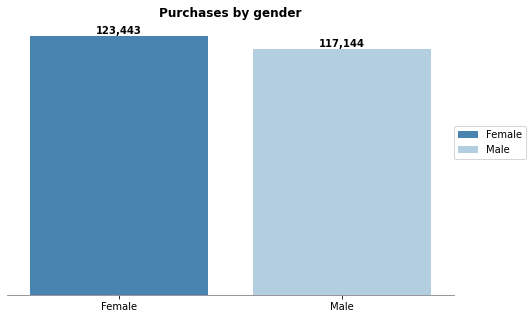

In [889]:
# Let's plot genders and how many bikes they buy
plt.figure(figsize=(8, 5))
g = df.groupby(['gender'])['purchased_bikes'].sum().reset_index().sort_values(by = ['purchased_bikes'], ascending=False)
ax = plt.axes()
ax.spines['bottom'].set_color('grey')
ax.spines['left'].set_color('grey')
ax.spines[['right', 'top']].set_visible(False)
sns.barplot(data = g, x = g['gender'], y = g['purchased_bikes'], hue = 'gender', dodge=False, palette='Blues_r')
plt.title('Purchases by gender', fontweight='bold')
# Remove the y-axis and its tick marks and labels
plt.gca().spines['left'].set_visible(False)
plt.tick_params(left=False, labelleft=False)
plt.ylabel('')
# Add text labels to the bars
for i, v in enumerate(g['purchased_bikes']):
    plt.text(i, v, '{:,}'.format(v), ha='center', va='bottom', fontweight='bold')
plt.xlabel('')
plt.legend(loc=(1, 0.5))
plt.show();

As observed from the data, the number of bicycles purchased by female customers over the past three years has surpassed that of their male counterparts.

How about if we continue to evalute the the ages of our customer

<Figure size 864x576 with 0 Axes>

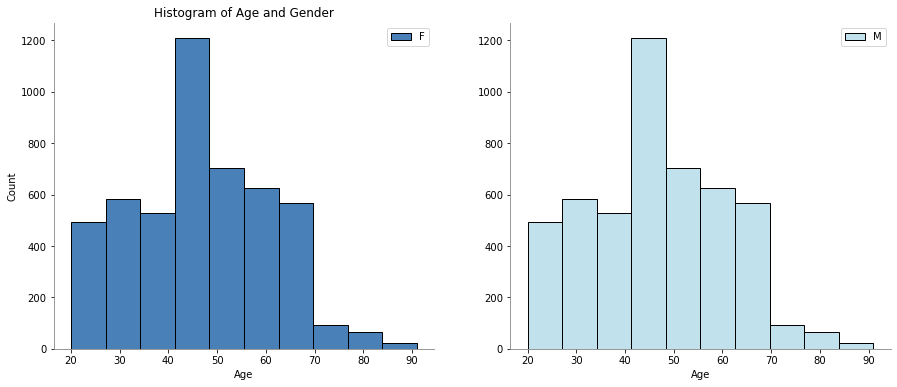

In [890]:
# Let's create a histogram to check our frequency 
plt.figure(figsize=(12, 8))
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
sns.histplot(data=df.loc[df['gender'] == 'Female'], x=df['Age'], bins=10, ax=ax1)
sns.histplot(data=df.loc[df['gender'] == 'Male'], x=df['Age'], bins=10, ax=ax2, color='#ADD8E6')
ax1.set_title('Histogram of Age and Gender')
ax1.set_xlabel('Age')
ax1.set_ylabel('Count')
ax1.legend('Female')
ax1.spines['bottom'].set_color('grey') #Setting color grey of bottom axis
ax1.spines['left'].set_color('grey') #Setting color grey of left axis
ax1.spines[['right', 'top']].set_visible(False)
ax2.set_xlabel('Age')
ax2.legend('Male')
ax2.spines['bottom'].set_color('grey') #Setting color grey of bottom axis
ax2.spines['left'].set_color('grey') #Setting color grey of left axis
ax2.spines[['right', 'top']].set_visible(False)
ax2.set_ylabel('')
plt.show();

The two charts show a similar distribution of ages among our customers (mostly between 40-50), regardless of gender.

Let's analyze the job_industry feature to identify the most common industry among our customers.

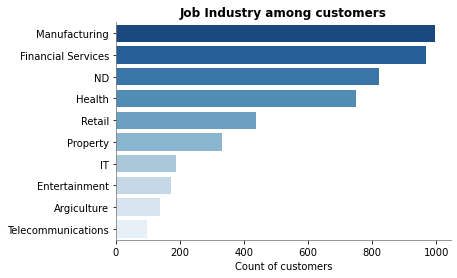

In [891]:
# Let's plot a chart bar to visualize our top Job Industry Category
ind = df.groupby(['job_industry_category'])['customer_id'].count().sort_values(ascending=False).reset_index(drop=False)
ax = plt.axes()
ax.spines['bottom'].set_color('grey') #Setting color grey of bottom axis
ax.spines['left'].set_color('grey') #Setting color grey of left axis
ax.spines[['right', 'top']].set_visible(False)
sns.barplot(x= ind['customer_id'], y = ind['job_industry_category'], orient='h', palette='Blues_r')
plt.ylabel('')
plt.xlabel('Count of customers')
plt.title('Job Industry among customers', fontweight='bold')
plt.show()

Our analysis of the customer data has provided us with some valuable insights. We can see that the third-largest group of customers is those who have not specified their industry. This suggests that we have a large segment of customers who are not being targeted effectively. We will need to do further research to understand these customers better and identify ways to reach them with more relevant messages.

Following our analysis of the industry feature, we would like to also analyze the wealth_segment feature.

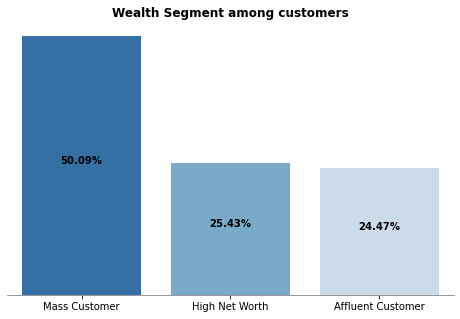

In [892]:
# Let's plot a chart bar to visualize our top Job Industry Category
plt.figure(figsize=(8, 5))
w = df.groupby(['wealth_segment'])['customer_id'].count().sort_values(ascending=False).reset_index(drop=False)
ax = plt.axes()
ax.spines['bottom'].set_color('grey') #Setting color grey of bottom axis
ax.spines['left'].set_color('grey') #Setting color grey of left axis
ax.spines[['right', 'top']].set_visible(False)
sns.barplot(y= w['customer_id'], x = w['wealth_segment'], palette='Blues_r')
# Add the percentage of the total number to the bars
for i, bar in enumerate(plt.gca().patches):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_y() + bar.get_height() / 2,
              '{:.2f}%'.format(bar.get_height() / w['customer_id'].sum() * 100),
              ha='center', va='bottom', fontweight='bold')
plt.gca().spines['left'].set_visible(False)
plt.tick_params(left=False, labelleft=False)
plt.ylabel('')
plt.xlabel('')
plt.title('Wealth Segment among customers', fontweight='bold')
plt.show()

Based on our analysis of the customer data, we see that mass customers represent half of our customer base. This suggests that our bikes should be priced more affordably so that this segment of customers can continue to acquire more bikes.

Here are some additional points that you may want to consider when making this decision:

* The average income of mass customers
* The price of other bikes in the market
* The quality of your bikes

It would be helpful to know the percentage of our customers who own a car. This information would give us valuable insights into our customer base and help us to better target our marketing efforts. I suggest that we create a bar chart to visualize this data.

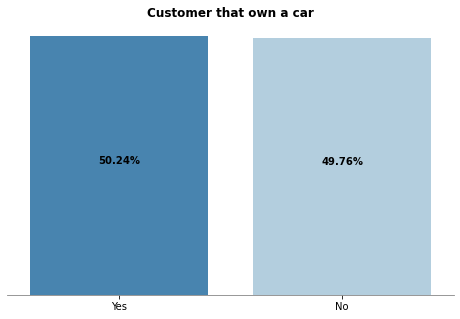

In [893]:
# Let's plot a chart bar to visualize our the percentage between customer who owns a car or not
plt.figure(figsize=(8, 5))
w = df.groupby(['owns_car'])['customer_id'].count().sort_values(ascending=False).reset_index(drop=False)
ax = plt.axes()
ax.spines['bottom'].set_color('grey') #Setting color grey of bottom axis
ax.spines['left'].set_color('grey') #Setting color grey of left axis
ax.spines[['right', 'top']].set_visible(False)
sns.barplot(y= w['customer_id'], x = w['owns_car'], palette='Blues_r')
# Add the percentage of the total number to the bars
for i, bar in enumerate(plt.gca().patches):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_y() + bar.get_height() / 2,
              '{:.2f}%'.format(bar.get_height() / w['customer_id'].sum() * 100),
              ha='center', va='bottom', fontweight='bold')
plt.gca().spines['left'].set_visible(False)
plt.tick_params(left=False, labelleft=False)
plt.ylabel('')
plt.xlabel('')
plt.title('Customer that own a car', fontweight='bold', fontname='Calibri')
plt.show()

Oh great! The "owns a car" column is evenly distributed. We can now consider developing a marketing campaign that promotes the use of bicycles, even for customers who own cars. This could encourage them to spend more time cycling and less time driving and at the same time helping the environment.

What about tenure in our customers? How long do they keep with our brand?

<Figure size 576x432 with 0 Axes>

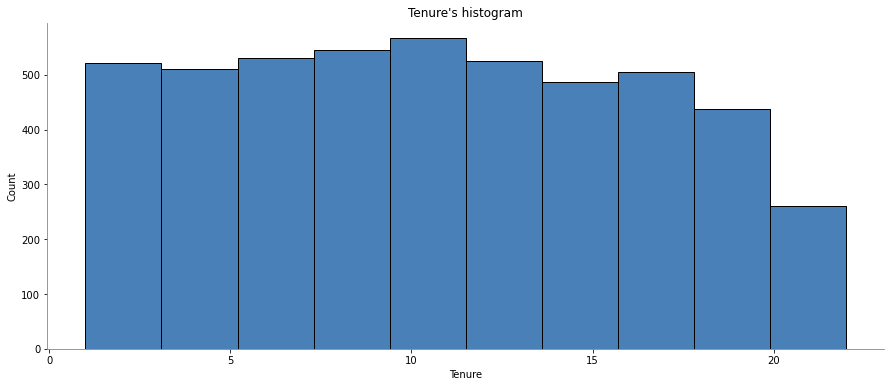

In [894]:
# Let's create a histogram to check our tenure-frequency
plt.figure(figsize=(8, 6))
f, (ax1) = plt.subplots(1, figsize=(15, 6))
sns.histplot(data=df, x=df['tenure'],bins=10, ax=ax1)
ax1.set_title("Tenure's histogram")
ax1.set_xlabel('Tenure')
ax1.set_ylabel('Count')
ax1.spines['bottom'].set_color('grey') #Setting color grey of bottom axis
ax1.spines['left'].set_color('grey') #Setting color grey of left axis
ax1.spines[['right', 'top']].set_visible(False)

The average tenure of our customers is 10.81 years. The distribution of tenure is uniform, with a slight skew towards newer customers. This suggests that our engagement strategies are working well and that we are attracting new customers at a steady rate. We can now focus on retaining our existing customers, particularly those who have been with us for more than 10 years. We can do this by providing them with excellent customer service, offering them exclusive discounts and promotions, and keeping them up-to-date on our latest products and services.

However, we need to know where our sales are coming from. Which states have the strongest sales? This information will help us to identify our target markets and allocate our marketing resources more effectively.

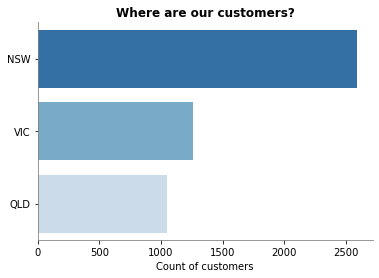

In [895]:
# Let's plot a chart bar to visualize our top states
sta = df.groupby(['state'])['customer_id'].count().sort_values(ascending=False).reset_index(drop=False)
ax = plt.axes()
ax.spines['bottom'].set_color('grey') #Setting color grey of bottom axis
ax.spines['left'].set_color('grey') #Setting color grey of left axis
ax.spines[['right', 'top']].set_visible(False)
sns.barplot(x= sta['customer_id'], y = sta['state'], orient='h', palette='Blues_r')
plt.ylabel('')
plt.xlabel('Count of customers')
plt.title('Where are our customers?', fontweight='bold')
plt.show()

Now that we have identified the majority of our customers' locations, we can wisely allocate our resources to those areas. This will help us to reach more customers and increase our sales.

After plotting our features, do these numerical features have any correlation between them? Let's find out.

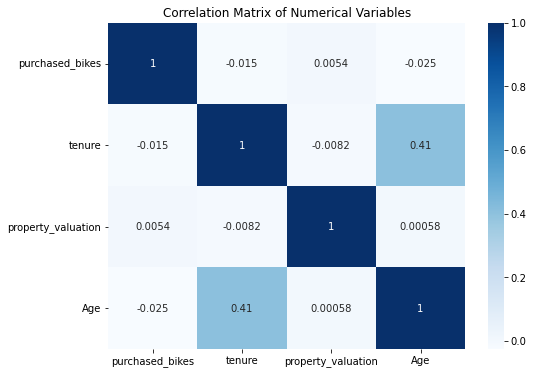

In [896]:
numerical_vars = ['purchased_bikes', 'tenure', 'property_valuation', 'Age']
correlation_matrix = df[numerical_vars].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues')
plt.title('Correlation Matrix of Numerical Variables')
plt.yticks(rotation=0)
plt.show()

We observed that there is no strong correlation between most of the variables, except for age and tenure, which are both related to time with the brand.

Now that we have completed the exploratory data analysis (EDA) of the demographic dataset, we can proceed with the EDA of the transaction dataset.

In [897]:
# Let's see our transaction over the time
t = transac.copy() # Easy to code with just t as a variable

In [898]:
t.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19445 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           19445 non-null  int64         
 1   product_id               19445 non-null  int64         
 2   customer_id              19445 non-null  int64         
 3   transaction_date         19445 non-null  datetime64[ns]
 4   online_order             19445 non-null  object        
 5   order_status             19445 non-null  object        
 6   brand                    19445 non-null  object        
 7   product_line             19445 non-null  object        
 8   product_class            19445 non-null  object        
 9   product_size             19445 non-null  object        
 10  list_price               19445 non-null  float64       
 11  standard_cost            19445 non-null  float64       
 12  product_first_sold_date  19445 n

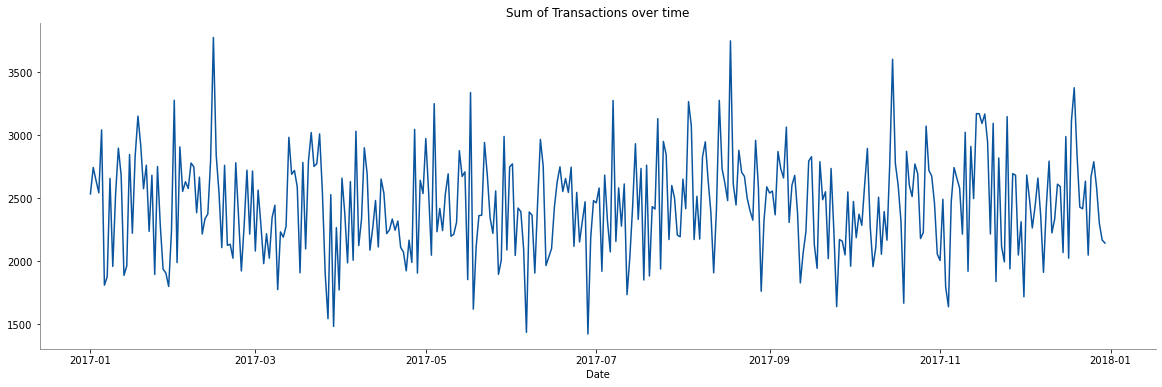

In [899]:
# Let's group our dates and sum all the transactions made in that date
tot = t.groupby(['transaction_date'])['product_id'].sum().reset_index()
# Plot the line chart
plt.figure(figsize=(20, 6))
ax = plt.axes()
ax.spines['bottom'].set_color('grey') #Setting color grey of bottom axis
ax.spines['left'].set_color('grey') #Setting color grey of left axis
ax.spines[['right', 'top']].set_visible(False)
plt.plot(tot['transaction_date'], tot['product_id'])
plt.xlabel('Date')
plt.ylabel('')
plt.title('Sum of Transactions over time')
plt.show()

As we can see, our transactions have been very regular throughout the year 2017. Let's evaluate which days have the most concurrent transactions.

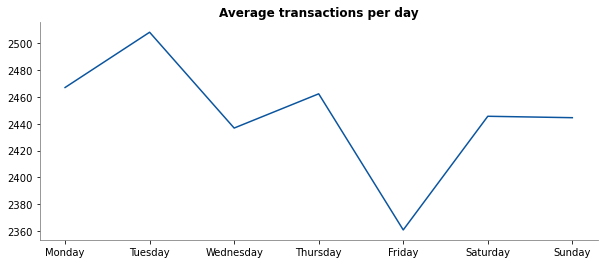

In [900]:
tot['day'] = tot['transaction_date'].dt.strftime('%A')
avg_day_sales = tot.groupby(['day'])['product_id'].mean().reset_index()
sort_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'] # Define the custom sort order
avg_day_sales['day'] = pd.Categorical(avg_day_sales['day'], categories=sort_order, ordered=True) # Convert 'day_name' column to Categorical data type with the custom sort order
avg_day_sales = avg_day_sales.sort_values('day' )# Sort the DataFrame by the 'day_name' column
plt.figure(figsize=(10, 4))
ax = plt.axes()
ax.spines['bottom'].set_color('grey') #Setting color grey of bottom axis
ax.spines['left'].set_color('grey') #Setting color grey of left axis
ax.spines[['right', 'top']].set_visible(False)
plt.plot(avg_day_sales['day'], avg_day_sales['product_id'])
plt.ylabel('')
plt.xlabel('')
plt.title('Average transactions per day', fontweight='bold')
plt.show()

Tuesday is our highest-volume day for transactions. In the future, we can discuss with the client what is happening on Fridays and how we can improve that day's performance.

What about our online and in-store transactions? Let's plot a bar to evaluate their numbers

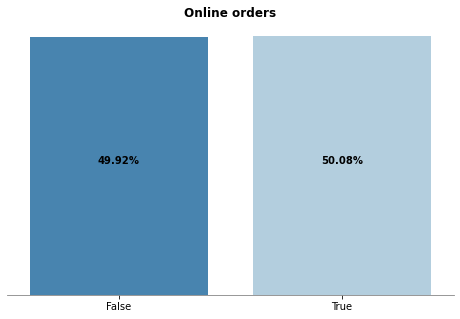

In [901]:
# Let's plot a chart bar to visualize our the percentage between customer who owns a car or not
plt.figure(figsize=(8, 5))
oi = t.groupby(['online_order'])['product_id'].count().sort_values(ascending=False).reset_index(drop=False)
ax = plt.axes()
ax.spines['bottom'].set_color('grey') #Setting color grey of bottom axis
ax.spines['left'].set_color('grey') #Setting color grey of left axis
ax.spines[['right', 'top']].set_visible(False)
sns.barplot(y= oi['product_id'], x = oi['online_order'], palette='Blues_r')
# Add the percentage of the total number to the bars
for i, bar in enumerate(plt.gca().patches):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_y() + bar.get_height() / 2,
              '{:.2f}%'.format(bar.get_height() / oi['product_id'].sum() * 100),
              ha='center', va='bottom', fontweight='bold')
plt.gca().spines['left'].set_visible(False)
plt.tick_params(left=False, labelleft=False)
plt.ylabel('')
plt.xlabel('')
plt.title('Online orders', fontweight='bold', fontname='Calibri')
plt.show()

The transaction volume has been very evenly distributed throughout the year. Has this been the case historically?

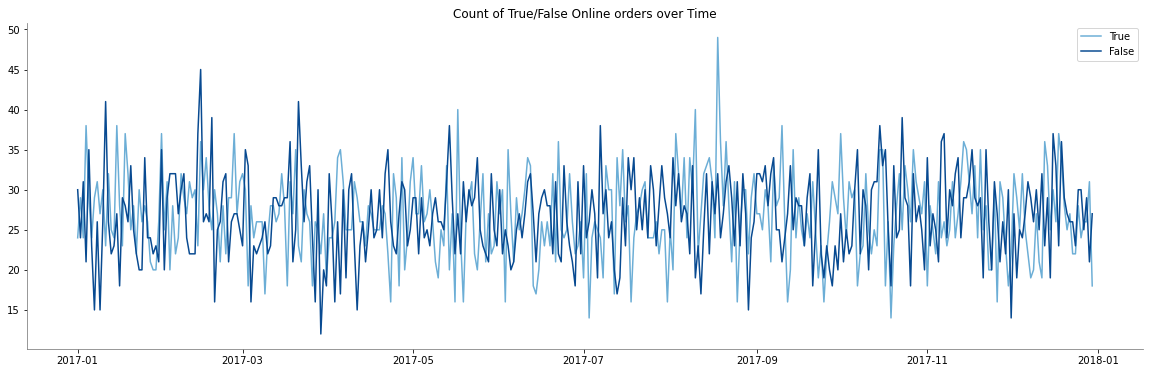

In [902]:
# Group by 'transaction_date' and 'online_order', and count occurrences
count_df = t.groupby(['transaction_date', 'online_order']).size().unstack().reset_index()
plt.figure(figsize=(20, 6))
ax = plt.axes()
ax.spines['bottom'].set_color('grey')
ax.spines['left'].set_color('grey')
ax.spines[['right', 'top']].set_visible(False)
plt.plot(count_df['transaction_date'], count_df[True], label='True', color=Blues_r(0.5))
plt.plot(count_df['transaction_date'], count_df[False], label='False', color=Blues_r(0.1))
plt.xlabel('')
plt.ylabel('')
plt.title('Count of True/False Online orders over Time')
plt.legend()
plt.show()

Yes, they keep the balance over the months. 

Now we can continue analyzing our "brand", "product_line", "product_class" and "product_size"

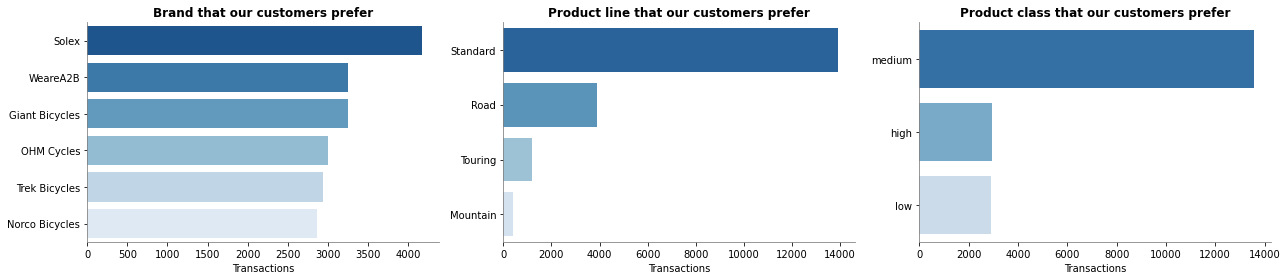

In [903]:
# Compute and sort the data for the top brand chart
b = t.groupby(['brand'])['product_id'].count().sort_values(ascending=False).reset_index(drop=False)

# Compute and sort the data for the top product line chart
p = t.groupby(['product_line'])['product_id'].count().sort_values(ascending=False).reset_index(drop=False)

# Compute and sort the data for the top product class chart
c = t.groupby(['product_class'])['product_id'].count().sort_values(ascending=False).reset_index(drop=False)

# Create a figure with two subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 4))

# Plot the top brand chart in the first subplot
axes[0].spines['bottom'].set_color('grey')
axes[0].spines['left'].set_color('grey')
axes[0].spines[['right', 'top']].set_visible(False)
sns.barplot(x=b['product_id'], y=b['brand'], orient='h', palette='Blues_r', ax=axes[0])
axes[0].set_ylabel('')
axes[0].set_xlabel('Transactions')
axes[0].set_title('Brand that our customers prefer', fontweight='bold')

# Plot the top product line chart in the second subplot
axes[1].spines['bottom'].set_color('grey')
axes[1].spines['left'].set_color('grey')
axes[1].spines[['right', 'top']].set_visible(False)
sns.barplot(x=p['product_id'], y=p['product_line'], orient='h', palette='Blues_r', ax=axes[1])
axes[1].set_ylabel('')
axes[1].set_xlabel('Transactions')
axes[1].set_title('Product line that our customers prefer', fontweight='bold')

# Let's plot a chart bar to visualize our top product class
axes[2].spines['bottom'].set_color('grey') #Setting color grey of bottom axis
axes[2].spines['left'].set_color('grey') #Setting color grey of left axis
axes[2].spines[['right', 'top']].set_visible(False)
sns.barplot(x= c['product_id'], y = c['product_class'], orient='h', palette='Blues_r')
axes[2].set_ylabel('')
axes[2].set_xlabel('Transactions')
axes[2].set_title('Product class that our customers prefer', fontweight='bold')

# Adjust spacing between subplots
plt.tight_layout()

# Display the figure with both subplots
plt.show()

Solex is our top-selling brand, but the other brands are not far behind. This indicates that we have a good balance of brands.

We observed a significant difference in product line sales. We have some opportunities to improve our sales in other product lines by running campaigns. 

The same trend is observed for a product class, with people tending to buy medium-class products.

Now that we observed that our customer has preference in our medium class, we can evaluate the price on each class and try to understand if the price is related to this decision

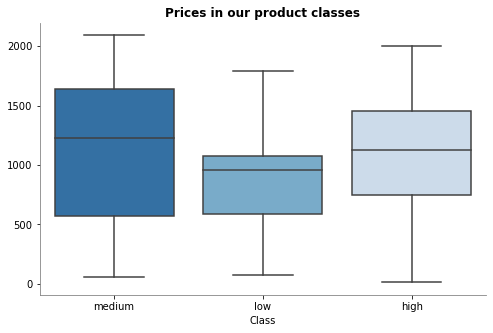

In [904]:
# Let's plot a chart bar to visualize our top prices
plt.figure(figsize=(8, 5))
ax = plt.axes()
ax.spines['bottom'].set_color('grey')
ax.spines['left'].set_color('grey')
ax.spines[['right', 'top']].set_visible(False)
sns.boxplot(x= t['product_class'], y = t['list_price'], palette='Blues_r')
plt.ylabel('')
plt.xlabel('Class')
plt.title('Prices in our product classes', fontweight='bold')
plt.show()

The average price of medium-class products is the highest, which suggests that price is not the only factor influencing customer purchasing decisions. Could this be due to brand preference?

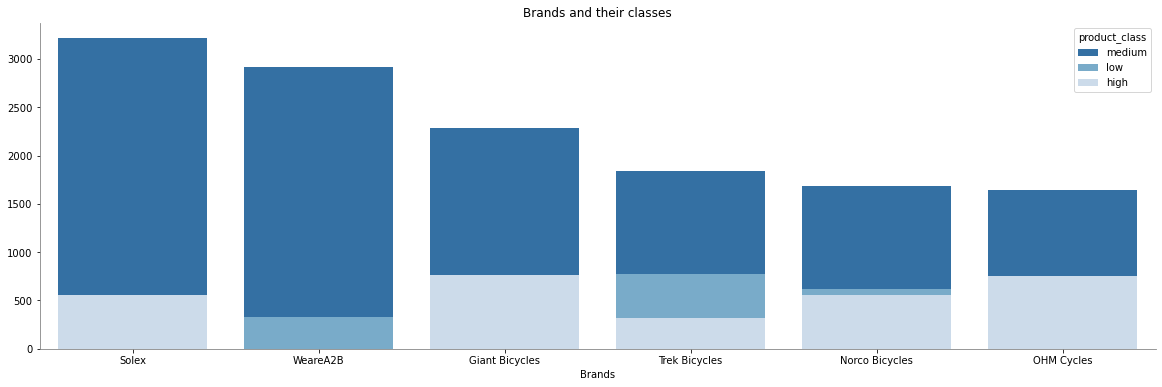

In [905]:
# Let's plot the brands and their classes
k = t.groupby(['product_class', 'brand'])['product_id'].count().sort_values(ascending=False).reset_index(drop=False)
plt.figure(figsize=(20, 6))
ax = plt.axes()
ax.spines['bottom'].set_color('grey')
ax.spines['left'].set_color('grey')
ax.spines[['right', 'top']].set_visible(False)
sns.barplot(data = k, x = k['brand'], y = k['product_id'], hue = k['product_class'], dodge=False, palette='Blues_r')
plt.xlabel('Brands')
plt.ylabel('')
plt.title('Brands and their classes')
plt.show()

Yes, all of our brands are primarily consumed by the medium class.

By obtaining the price and cost of each transaction, we can calculate the profit margin and evaluate which products are generating the most revenue for the company. This new feature will help us to gain a better understanding of our financial performance.

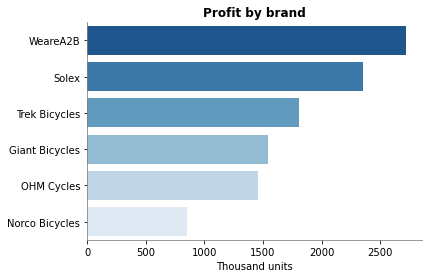

In [906]:
t['profit'] = (t['list_price'] - t['standard_cost'])
# Let's plot a chart bar to visualize our profit
p = t.groupby(['brand'])['profit'].sum().sort_values(ascending=False).reset_index(drop=False)
p['profit'] = p['profit']/1000
ax = plt.axes()
ax.spines['bottom'].set_color('grey') #Setting color grey of bottom axis
ax.spines['left'].set_color('grey') #Setting color grey of left axis
ax.spines[['right', 'top']].set_visible(False)
sns.barplot(x= p['profit'], y = p['brand'], orient='h', palette='Blues_r')
plt.ylabel('')
plt.xlabel('Thousand units')
plt.title('Profit by brand', fontweight='bold')
plt.show() 

We observe a different pattern in profit. WeareA2B is now generating more profit than the other brands. The order of brands in terms of profit does not follow the same order as transaction. This is a good point to evaluate and negotiate to take advantage of the brand that brings more value to our customers.

Now that we have covered all of the features in this dataset, we can proceed with the analysis and segmentation of our customers. 

Let's start applying RFM (Recency, Frequency, Monetary) in our transaction table.

In [907]:
# To calculate the recency, we can assume that the current year is 2018. This will provide a more accurate calculation, as it will take into account the most recent data.
reference_date = datetime(2018, 1, 1)

In [908]:
# Let's see again our dataset
t.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,profit
0,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,71.49,53.62,02/12/2012,17.87
1,2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,03/03/2014,1702.55
2,3,37,402,2017-10-16,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,20/07/1999,1544.61
3,4,88,3135,2017-08-31,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,16/12/1998,817.36
4,5,78,787,2017-01-10,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,10/08/2015,1055.82


In [933]:
# Let's calculate these three features
rfm = t.groupby('customer_id').agg({'transaction_date' : lambda day : (reference_date - day.max()).days, # Let's calculate in days when was their last purchased
'transaction_id' : lambda num : len(num), # Let's see how many transaction they have
'list_price' : lambda price : price.sum()}).reset_index() # How much they spent in all the purchased
# Let's have a look to the new table
rfm.head()

,customer_id,transaction_date,transaction_id,list_price
0,1,9,11,9084.45
1,2,56,3,4149.07
2,3,104,7,9525.22
3,4,197,2,1047.72
4,5,18,6,5903.20


Now that we have the aggregated dataframe, we can rename the columns to make them more descriptive. This will make the analysis easier to understand and interpret.

In [911]:
# Let's change the name of our columns to the RFM
col_names = ['customer_id', 'Recency', 'Frequency', 'Monetary']
rfm.columns = col_names
rfm.head()

,customer_id,Recency,Frequency,Monetary
0,1,9,11,9084.45
1,2,56,3,4149.07
2,3,104,7,9525.22
3,4,197,2,1047.72
4,5,18,6,5903.20


We can now proceed to create the R, F, and M columns, each with its respective score, on a scale of 1 to 5. A score of 5 is our highest score.

We will use the pandas function q.cut to divide each of the RFM factors (Recency, Frequency, and Monetary value) into equal-sized bins or quantiles. This will allow us to assign a score to each customer based on their RFM values.

In [912]:
# Let's create the columns
rfm["R"] = pd.qcut(rfm["Recency"],5,labels=[1,2,3,4,5])
rfm["F"] = pd.qcut(rfm["Frequency"],5,labels=[1,2,3,4,5])
rfm["M"] = pd.qcut(rfm["Monetary"],5,labels=[1,2,3,4,5])

As our previous analysis showed, our high-volume customers are in the standard class and wealth segment of the mass consumer market. We have decided to prioritize loyal customers, so we have ordered the importance of our RFM score as follows: frequency, monetary value, and recency.

Weights:
* Frequency: 40%
* Monetary: 30%
* Recency: 30%

In [913]:
# Define the weights for each RFM factor
weights = {'Recency': 0.3, 'Frequency': 0.4, 'Monetary': 0.3}
# Apply our weights in our columns
rfm['R'] = rfm['R'].astype('int') * weights['Recency']
rfm['F'] = rfm['F'].astype('int') * weights['Frequency']
rfm['M'] = rfm['M'].astype('int') * weights['Monetary']
# Calculate our RFM score
rfm['RFM_Score'] = rfm['R'] + rfm['F'] + rfm['M']
rfm.head()

,customer_id,Recency,Frequency,Monetary,R,F,M,RFM_Score
0,1,9,11,9084.45,0.3,2.0,1.5,3.8
1,2,56,3,4149.07,0.9,0.4,0.6,1.9
2,3,104,7,9525.22,1.2,1.6,1.5,4.3
3,4,197,2,1047.72,1.5,0.4,0.3,2.2
4,5,18,6,5903.20,0.6,1.2,0.9,2.7


Great! Now that we have our scores for each customer ID, we can segment our customers into three sections:

* 1-2: These customers need our attention. We need to address their needs or understand why they are here. We can call them "Need attention."
* 3-4: These customers are loyal but need to be pushed further to become more frequent. We can call them "Loyal customers."
* > 4: These customers are our champions. We can reward them and keep them engaged in our loyalty program. We can call them "Champions."

In [914]:
# Set the desired name based on the condition
rfm['Segment'] = None
rfm.loc[rfm['RFM_Score'] <= 2, 'Segment'] = 'Need_attention'
rfm.loc[(rfm['RFM_Score'] > 2) & (rfm['RFM_Score'] <= 4), 'Segment'] = 'Loyal_customers'
rfm.loc[rfm['RFM_Score'] > 4, 'Segment'] = 'Champions'

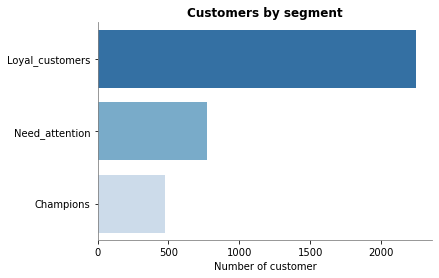

In [915]:
# Let's plot the number of customers by each segment
seg = rfm.groupby(['Segment'])['customer_id'].count().sort_values(ascending=False).reset_index(drop=False)
ax = plt.axes()
ax.spines['bottom'].set_color('grey')
ax.spines['left'].set_color('grey')
ax.spines[['right', 'top']].set_visible(False)
sns.barplot(x= seg['customer_id'], y = seg['Segment'], orient='h', palette='Blues_r')
plt.ylabel('')
plt.xlabel('Number of customer')
plt.title('Customers by segment', fontweight='bold')
plt.show() 

The majority of our customers are in the "Loyal customer" segment, followed by the "Need attention" segment. We can now provide these details to our marketing team so they can prepare specific campaigns for each segment.

We can add this information about our segments to the customer demographic dataset to have a complete profile of our customers. We can then analyze and group them based on all of their demographic details. This will give our marketing team more information to create effective campaigns.

What if we evaluate our customer segments using their transaction data? This could help us to identify any patterns or trends with the other features.

In [916]:
s_t = pd.merge(rfm, t, how='inner', on='customer_id') # Let's merge our tables of rfm and transactions
s_t.head()

,customer_id,Recency,Frequency,Monetary,R,F,M,RFM_Score,Segment,transaction_id,...,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,profit
0,1,9,11,9084.45,0.3,2.0,1.5,3.8,Loyal_customers,94,...,False,Approved,OHM Cycles,Standard,medium,medium,235.63,125.07,10/05/2005,110.56
1,1,9,11,9084.45,0.3,2.0,1.5,3.8,Loyal_customers,3765,...,True,Approved,Solex,Standard,medium,medium,1577.53,826.51,19/03/2008,751.02
2,1,9,11,9084.45,0.3,2.0,1.5,3.8,Loyal_customers,5157,...,True,Approved,Trek Bicycles,Road,low,small,1720.70,1531.42,21/07/2003,189.28
3,1,9,11,9084.45,0.3,2.0,1.5,3.8,Loyal_customers,9785,...,False,Approved,Norco Bicycles,Standard,medium,medium,360.40,270.30,09/09/2003,90.10
4,1,9,11,9084.45,0.3,2.0,1.5,3.8,Loyal_customers,13424,...,False,Approved,Solex,Standard,medium,medium,71.49,53.62,09/08/2005,17.87


Using the list_price, we can calculate the average price that our customers spend in each segment. This information can be used to develop marketing strategies that are tailored to the needs of each segment.

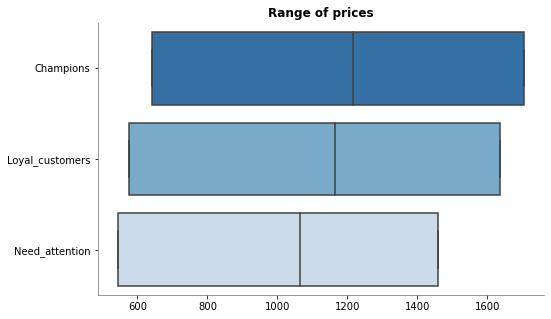

In [917]:
# Calculate the median values for each segment
medians = s_t.groupby('Segment')['list_price'].median()
# Sort segments based on median values
sorted_segments = medians.sort_values(ascending=False).index

# Let's plot a chart bar to visualize our prices between the segments
plt.figure(figsize=(8, 5))
ax = plt.axes()
ax.spines['bottom'].set_color('grey')
ax.spines['left'].set_color('grey')
ax.spines[['right', 'top']].set_visible(False)
sns.boxplot(x= s_t['list_price'], y = s_t['Segment'], order=sorted_segments, palette='Blues_r', showfliers=False, whis=[25, 75]) # Only using the 25th and 75th percentiles
plt.ylabel('')
plt.xlabel('')
plt.title('Range of prices', fontweight='bold')
plt.show()

As expected, our champions are the segment of customers who spend the most money on our products. This information can be used to develop marketing strategies that are tailored to their needs. Additionally, we can use this information to estimate the price that our customers are willing to pay for new products. This information can be used to set a price that is both competitive and profitable.

I would like to know if our customer segments have any brand preferences. This information could be used to develop marketing strategies that are tailored to the needs of each segment.

<Figure size 576x360 with 0 Axes>

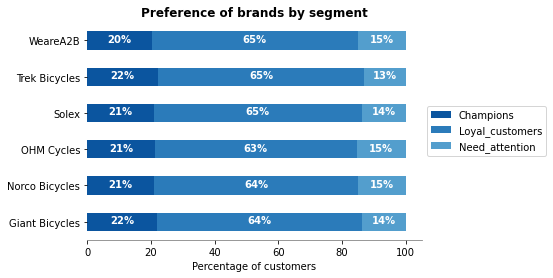

In [918]:
# Let's plot the number of customers by each segment
s_b = s_t.groupby(['Segment', 'brand'])['customer_id'].count().sort_values(ascending=False).reset_index(drop=False)

# Pivot the data to have segments as columns and brands as index
pivot_data = s_b.pivot(index='brand', columns='Segment', values='customer_id')

# Normalize the data within each brand to show percentages
normalized_data = pivot_data.div(pivot_data.sum(axis=1), axis=0) * 100

plt.figure(figsize=(8, 5))
# Plot a grouped bar chart
sns.set_palette('Blues_r')
ax = normalized_data.plot(kind='barh', stacked=True)
# Add the percentage values to each bar
for container in ax.containers:
    for bar in container:
        width = bar.get_width()
        x = bar.get_x() + bar.get_width() / 2
        y = bar.get_y() + bar.get_height() / 45
        percentage = f'{width:.0f}%'
        ax.annotate(percentage, (x, y), xytext=(0, 5), textcoords='offset points', ha='center', va='bottom', color='white', fontweight='bold')
plt.xlabel('Percentage of customers')
plt.ylabel('')
plt.title('Preference of brands by segment', fontweight='bold')
# Move the legend outside of the chart
ax.spines['bottom'].set_color('grey')
ax.spines['left'].set_color('grey')
ax.spines[['right', 'top', 'left']].set_visible(False)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

Our analysis shows that our customer segments have a similar percentage of customers who prefer each brand. However, the champions segment is more likely to prefer Trek Bicycles and Giant Bicycles. This information can be used to develop marketing strategies that are tailored to the needs of these customers. For example, we could target these customers with campaigns that feature these brands or offer discounts on these brands.

Now that we know our customers' brand preferences, we can review the average cost of these brands.

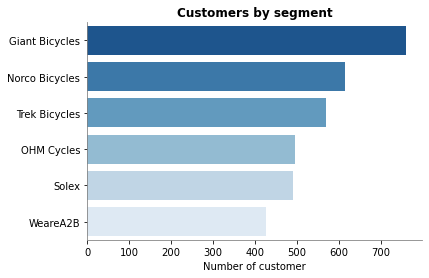

In [919]:
# Let's plot the cost of each brand
c = t.groupby(['brand'])['standard_cost'].mean().sort_values(ascending=False).reset_index(drop=False)
ax = plt.axes()
ax.spines['bottom'].set_color('grey')
ax.spines['left'].set_color('grey')
ax.spines[['right', 'top']].set_visible(False)
sns.barplot(x= c['standard_cost'], y = c['brand'], orient='h', palette='Blues_r')
plt.ylabel('')
plt.xlabel('Number of customer')
plt.title('Customers by segment', fontweight='bold')
plt.show()

Our analysis shows that Giant Bicycles is the most expensive brand, followed by Norco Bicycles and Trek Bicycles. This information can be used by our clients to negotiate better prices with these brands. Our clients can show the brands that they are the most expensive and that our customers prefer them. This could help our clients to get a better deal on the bikes.

I propose that we continue our deep analysis of our segmentation, but this time we also incorporate demographic information. This will allow us to discover patterns and identify the characteristics of our buyers.

For this analysis, we are going to apply the K-means algorithm

## Customer Segmentation with K-means

In order to improve our segmentation analysis, we would like to know the average order values by customer.

In [920]:
# Let's group our features for each customer
aggregations = {
    'list_price': 'mean'
}
a_o = t.groupby(['customer_id']).agg(aggregations).reset_index()
# Let's rename list_price to avg_order
a_o = a_o.rename(columns={'list_price': 'avg_order'})
a_o.head()

,customer_id,avg_order
0,1,825.859091
1,2,1383.023333
2,3,1360.745714
3,4,523.860000
4,5,983.866667


For the following analysis, we are going to select the following features:

* Age
* Gender 
* Location
* Purchase history
* Recency 
* Monetary
* Avg_order (order values)
* Products_line

These features were selected because they exhibited a greater diversity of data points than the other features during our exploratory data analysis (EDA).

We plan to use K-means clustering to segment our customer base based on their actual patterns and characteristics. This will allow us to identify groups of customers with similar attributes or behaviors so that we can tailor our marketing strategies to meet their specific needs, preferences, and values.

We propose that we merge the demographic and part of the RFM data sets to create a more comprehensive view of our customer base.

In [921]:
t.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date', 'profit'],
      dtype='object')

In [922]:
# Let's merge our tables with desire features to analyze
first_part = pd.merge(a_o, rfm[['customer_id', 'Frequency']], on='customer_id', how='inner')
first_part.head()

,customer_id,avg_order,Frequency
0,1,825.859091,11
1,2,1383.023333,3
2,3,1360.745714,7
3,4,523.860000,2
4,5,983.866667,6


Now that we have the features to analyze, we should standardize our values

In [923]:
A = first_part[['avg_order', 'Frequency']] #Numeric variables
# Initialize the StandardScaler object
scaler = MinMaxScaler(feature_range=(0, 1))
# Fit the scaler to the features and transform the data
standardized_data = scaler.fit_transform(A)
# Convert the standardized data back to a DataFrame
s_df = pd.DataFrame(standardized_data, columns=A.columns)
X_new = s_df.copy()
X_new

,avg_order,Frequency
0,0.376893,0.769231
1,0.651206,0.153846
2,0.640238,0.461538
3,0.228208,0.076923
4,0.454686,0.384615
...,...,...
3487,0.584740,0.153846
3488,0.395102,0.384615
3489,0.509998,0.461538
3490,0.374206,0.384615


Now that our features are standardized, we can proceed to select the number of clusters for our K-means clustering analysis.

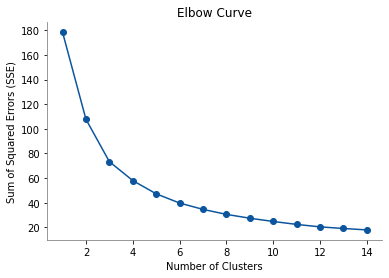

In [924]:
# Determine the optimal number of clusters, we will give them from 1-25 clusters to try
sse = []
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_new)
    sse.append(kmeans.inertia_)

# Plot the elbow curve
ax = plt.axes()
ax.spines['bottom'].set_color('grey')
ax.spines['left'].set_color('grey')
ax.spines[['right', 'top']].set_visible(False)
plt.plot(range(1, 15), sse, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Curve')
plt.show()

After analyzing the elbow curve chart, we have determined that the optimal number of clusters for our customer segmentation is 5. We can observe that after cluster 5 our SSE doesn't drop drastically. 

In [925]:
# Based on the elbow curve, select the optimal number of clusters
k = 5

# Perform k-means clustering to our data
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_new)

KMeans(n_clusters=5, random_state=42)

In [926]:
# Calculate within-cluster sum of squares (WCSS) for each feature
wcss_scores = []
for feature in X_new.columns:
    feature_data = X_new[[feature]]
    kmeans_feature = KMeans(n_clusters=k)
    kmeans_feature.fit(feature_data)
    wcss_scores.append(kmeans_feature.inertia_)

# Calculate feature importance as the percentage contribution to total WCSS
total_wcss = sum(wcss_scores)
feature_importance = [score / total_wcss for score in wcss_scores]

# Print the feature importance values
for i, feature in enumerate(X_new.columns):
    print(f"{feature}: {feature_importance[i]}")


avg_order: 0.465660599135718
Frequency: 0.5343394008642821


In [927]:
# Assign cluster labels to the data
first_part['Segment_k'] = kmeans.labels_

Now that we have our customer segments, let's count the number of customers in each segment. This will allow us to get a better understanding of the size and composition of each segment.

In [928]:
g = first_part.groupby(['Segment_k'])['customer_id'].count().sort_values(ascending=False).reset_index()
g

,Segment_k,customer_id
0,0,901
1,4,741
2,1,651
3,3,609
4,2,590


Let's analyze the aggregated data for each group and identify any patterns. This will help us to better understand the behavior of our customers and develop more effective marketing strategies.

In [929]:
aggregations = {
    'avg_order': 'mean',
    'Frequency': 'mean'
}
k = first_part.groupby(['Segment_k']).agg(aggregations).reset_index()
k

,Segment_k,avg_order,Frequency
0,0,938.028658,5.995560
1,1,1369.381566,3.172043
2,2,780.685403,3.283051
3,3,1101.584603,9.167488
4,4,1343.536220,6.016194


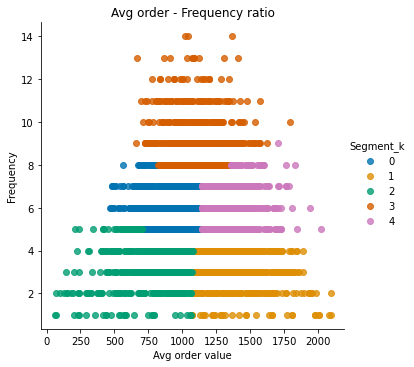

In [930]:
# Change to another sns or plt
sns.lmplot(x='avg_order', y='Frequency', data=first_part, fit_reg=False, hue='Segment_k', legend=True, palette='colorblind')
plt.title('Avg order - Frequency ratio')
plt.xlabel('Avg order value')
plt.ylabel('Frequency')
# plt.savefig('scat_cs.jpg', bbox_inches='tight')
plt.show();

Having obtained the segmentation, we will export a CSV file and use Tableau to visualize the data points in each segment. This will allow us to gain a better understanding of the data and identify any trends or patterns.

In [931]:
first_part.to_csv('./segment_ds.csv', index=False) # Save the file to csv.
t.to_csv('./trasanctions_ds.csv', index=False) # Save the file to csv.
df.to_csv('./demo_ds.csv', index=False) # Save the file to csv.

We are going to explain some segmentation that can help to the marketing team.

First Segment 0:
* Number of customer: 860
* State: NSW
* Gender: Male
* Product_line: Standard
* Age: 40-45
* Recency: Low. That means that a customer has purchased within a recent period.
* Avg order value: $800 - $1200
* Total spend: $4k - $6k 

Our Standard product line is popular with 860 men who typically spend between $800 and $1200 per order. These customers have a total annual spend of around $5,000. They have been buying our products recently, so we can include the following message in our campaign:

"We see that you have recently purchased our products. We would like to offer you a special discount on additional products. This is a great opportunity to try new products and expand your interest in our brand."

Second Segment 1:
* Number of customer: 289
* State: VIC
* Gender: Female
* Product_line: Road
* Age: 40-45
* Recency: Low. That means that a customer has purchased within a recent period.
* Avg order value: $400 - $800
* Total spend: $3k - $5k 

Our Road product line is popular with 289 women who typically spend between $400 and $800 per order. These customers have a total annual spend of around $4,000. Also, they have been buying our products recently.

Third Segment 2:
* Number of customers: 350
* State: QLD
* Gender: Male
* Product_line: Standard
* Age: 40-45
* Recency: Low. That means that a customer has purchased within a recent period.
* Avg order value: $800 - $1200
* Total spend: $3k - $6k 

In Queensland, our Standard product line is popular with 350 men who typically spend between $800 and $1200 per order. These customers have a total annual spend of around $4,500. Also, they have been buying our products recently.

Forth Segment 3:
* Number of customers: 932
* State: NSW
* Gender: Female
* Product_line: Standard
* Age: 45-50
* Recency: Low. That means that a customer has purchased within a recent period.
* Avg order value: $800 - $1200
* Total spend: $3k - $5k 

In Queensland, our Standard product line is popular with 932 women who typically spend between $800 and $1200 per order. These customers have a total annual spend of around $4,500. Also, they have been buying our products recently.

Fifth Segment 4:
* Number of customers: 499
* State: NSW, QLD, VIC
* Gender: Male
* Product_line: Touring
* Age: 45-50
* Recency: Low. That means that a customer has purchased within a recent period.
* Avg order value: $1800 - $2000
* Total spend: $5k - $7k 

In Queensland, our Standard product line is popular with 499 men who typically spend between $1800 and $2000 per order. These customers have a total annual spend of around $4,500. Also, they have been buying our products recently.